In [1]:
!pip install opendatasets

     ---------------------------------------- 82.7/82.7 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ------------------------------------- 163.4/163.4 kB 10.2 MB/s eta 0:00:00
     ---------------------------------------- 78.2/78.2 kB 4.2 MB/s eta 0:00:00
  Running setup.py install for kaggle: started
  Running setup.py install for kaggle: finished with status 'done'


  DEPRECATION: kaggle is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559

[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/wcukierski/enron-email-dataset/data')

Skipping, found downloaded files in ".\enron-email-dataset" (use force=True to force download)


In [5]:
import pandas as pd
data=pd.read_csv(r"C:\Users\desha\Desktop\hireforge\enron-email-dataset\emails.csv")

KeyboardInterrupt: 

In [4]:
data.head()

,file,message
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...


In [5]:
df=data.copy()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517401 entries, 0 to 517400
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   file     517401 non-null  object
 1   message  517401 non-null  object
dtypes: object(2)
memory usage: 7.9+ MB


In [7]:
df.isnull().sum()

,0
file,0
message,0


In [8]:
#data cleaning


In [9]:
import email


In [10]:

#extract email-body and head
def extractmailitems(field, msg):
    elst = []

    for i, message in (msg.items()):
        e = email.message_from_string(message)
        elst.append(e.get(field))

    return elst

In [11]:
columns = ['Date', 'From', 'To', 'Subject', 'X-From', 'X-To', 'X-Folder', 'X-Origin', 'X-Filename']
for i in columns:
    df[i] = extractmailitems(i, df['message'])

In [12]:
def body(col):
    bodycolumn = []
    for message in col.values:
        e = email.message_from_string(message)
        bodycolumn.append(e.get_payload())

    return bodycolumn
df['Body'] = body(df['message'])

In [13]:
# extract emplyees' names from file column
def employees(files):
    employees = []
    for i, employee in files.items():
        employee = employee.split('/')[0]
        employees.append(employee)
    return employees
df['Employee'] = employees(df['file'])

In [14]:
df.sample(5)

,file,message,Date,From,To,Subject,X-From,X-To,X-Folder,X-Origin,X-Filename,Body,Employee
79785,dasovich-j/sent/1123.,Message-ID: <15428111.1075843211025.JavaMail.e...,"Wed, 22 Nov 2000 04:40:00 -0800 (PST)",jeff.dasovich@enron.com,jeffery.fawcett@enron.com,Re: A chicken in every pot,Jeff Dasovich,Jeffery Fawcett,\Jeff_Dasovich_Dec2000\Notes Folders\Sent,DASOVICH-J,jdasovic.nsf,"you do the same, buddy.",dasovich-j
207367,kaminski-v/all_documents/5027.,Message-ID: <19626928.1075856306879.JavaMail.e...,"Fri, 28 Jul 2000 03:01:00 -0700 (PDT)",vince.kaminski@enron.com,jhh1@email.msn.com,Re: Light reading - see pieces beginning on pa...,Vince J Kaminski,"""John H Herbert"" <jhh1@email.msn.com> @ ENRON",\Vincent_Kaminski_Jun2001_1\Notes Folders\All ...,Kaminski-V,vkamins.nsf,"John,\n\nI saw it. Very interesting.\n\nVince\...",kaminski-v
228546,kean-s/all_documents/20.,Message-ID: <27747410.1075846140320.JavaMail.e...,"Fri, 25 Apr 1997 01:00:00 -0700 (PDT)",steven.kean@enron.com,None,Washington DC to meet with Jefferds,Steven J Kean,,\Steven_Kean_Dec2000_1\Notes Folders\All docum...,KEAN-S,skean.nsf,\n\nLunch - still outstanding (No mci guy)\n\n...,kean-s
314238,mann-k/discussion_threads/4125.,Message-ID: <18751859.1075845855495.JavaMail.e...,"Thu, 17 May 2001 09:05:00 -0700 (PDT)",ccampbell@kslaw.com,"gregorylang@paulhastings.com, iparker@freshfie...",Salmon Transaction between ENA and PPL,"""Campbell, Carolyn"" <CCampbell@KSLAW.com>","""'gregorylang@paulhastings.com'"" <gregorylang@...",\Kay_Mann_June2001_2\Notes Folders\Discussion ...,MANN-K,kmann.nsf,Greg and Isabel:\n\nI still need signed copies...,mann-k
205620,kaminski-v/all_documents/3231.,Message-ID: <18747076.1075856261829.JavaMail.e...,"Mon, 13 Nov 2000 00:04:00 -0800 (PST)",vince.kaminski@enron.com,eric.gadd@enron.com,Re: Enron Case Studies,Vince J Kaminski,Eric Gadd,\Vincent_Kaminski_Jun2001_1\Notes Folders\All ...,Kaminski-V,vkamins.nsf,"Eric,\n\nI have one on EGS, one on Dhabol and ...",kaminski-v


In [15]:
df.drop(columns = ['file', 'message'], inplace=True)
df.dropna(axis = 0, inplace=True)
df.sample(5)

,Date,From,To,Subject,X-From,X-To,X-Folder,X-Origin,X-Filename,Body,Employee
279257,"Thu, 8 Mar 2001 05:39:00 -0800 (PST)",matthew.lenhart@enron.com,lisa.gillette@enron.com,Re:,Matthew Lenhart,Lisa Gillette,\Matthew_Lenhart_Nov2001\Notes Folders\Sent,LENHART-M,mlenhar.nsf,just kidding. we will probably just get drinks.,lenhart-m
432533,"Mon, 4 Dec 2000 00:20:00 -0800 (PST)",jeffrey.shankman@enron.com,jennifer.burns@enron.com,Urgent Messages!,Jeffrey A Shankman,Jennifer Burns,\Jeffrey_Shankman_Jun2001\Notes Folders\Discus...,Shankman-J,jshankm.nsf,put on calendar\n---------------------- Forwar...,shankman-j
160475,"Mon, 12 Mar 2001 02:58:00 -0800 (PST)",paramfjord@stoel.com,"kcurry@bracepatt.com, jmcgrane@morganlewis.com",Re: Response to PX Answer to Chargeback Complaint,"""Per Ramfjord"" <PARAMFJORD@stoel.com>","kcurry@bracepatt.com, jmcgrane@morganlewis.com",\Mary_Hain_Aug2000_Jul2001\Notes Folders\Notes...,Hain-M,mary-hain.nsf,Attached are my comments to the Answer. They ...,hain-m
353614,"Wed, 14 Mar 2001 01:33:00 -0800 (PST)",gerald.nemec@enron.com,"peter.keohane@enron.com, eric.ledain@enron.com",Kern River Bid Letter,Gerald Nemec,"Peter Keohane, Eric LeDain",\Gerald_Nemec_Dec2000_June2001_2\Notes Folders...,NEMEC-G,gnemec.nsf,Attached for your review is a draft letter for...,nemec-g
383952,"Thu, 19 Jul 2001 05:52:57 -0700 (PDT)",trading <.williams@enron.com>,kevin.ruscitti@enron.com,RE: resend,"Williams, Jason (Trading) </O=ENRON/OU=NA/CN=R...","Ruscitti, Kevin </O=ENRON/OU=NA/CN=RECIPIENTS/...",\KRUSCIT (Non-Privileged)\pictures,Ruscitti-K,KRUSCIT (Non-Privileged).pst,\n\n -----Original Message-----\nFrom: \tRus...,ruscitti-k


In [16]:
df.loc[99448, 'Body']

"I don't know what you're smokin up there, but every one of those deal numbers you listed are WRONG.  \n\nDeal 633842 is valid for mtr 416.  It has a zero nom.  You can send that to POPS or path a volume to the deal and send it on.\nI added the 15th-18th to deal 621598 for item (2).\nDeal 529738 is valid for mtr 1598.  It has a zero nom, also.\n\nD\n\n\n\n\nTom Acton@ENRON\n03/20/2001 03:21 PM\nTo:\tDaren J Farmer/HOU/ECT@ECT\ncc:\t \nSubject:\tDeal Tickets\n\nDaren I have three meters that have flow in Feb but no deal.\n\n1.  Meter 0416  flowed the whole month  1-28.  This our ols friends at Pawnee gas plant fuel.  Last deal used was 289396 could you extend it.\n2. meter 1601 had flow on the 15 &18.  This is Southern union Lockhart.  Last deal used with them was 285350 Hpl or 259208 ENA. \n3. Meter 1598 had flow the whole month 1-28.  This is MT Enterprise C/G- Panther.  The last deal used  is 284 620\n\nI'll get Accounting Arrangements for these when you let me know the deal status a

In [17]:
df.Employee.value_counts()[:20]

,count
Employee,
kaminski-v,27801
dasovich-j,27463
kean-s,23896
mann-k,23302
jones-t,19739
shackleton-s,18371
taylor-m,13371
farmer-d,12862
germany-c,12267


In [18]:
# changing the date format and type from string to date object
df['Date'] = pd.to_datetime(df['Date'], utc = True, dayfirst = True)
# creating a year column from the date column
df['Year'] = pd.DatetimeIndex(df['Date']).year

<ipython-input-18-b591fed99a11>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], utc = True, dayfirst = True)


In [19]:
import re

In [20]:
def extract(col):
    regcol = []
    for sent in col.values:

        if str(sent).startswith('<'):
            reg = re.split(r'@|\(', str(sent))[0]
            reg = re.findall(r'[a-zA-Z]+\'?-?', str(reg))

        elif re.match(r'^\d+', str(sent)):
            reg = re.split(r'@|\(', str(sent))[0]
            reg = re.findall(r'[0-9]+\'?-?', str(reg))

        else:
            reg = re.split(r'@|<|\(', str(sent))[0]
            reg = re.findall(r'[a-zA-Z]+\'?-?', str(reg))

        reg = re.sub(r'[\'\",]', '', str(reg))
        regcol.append(str(reg.strip('[]')))


    return regcol

In [21]:
df['X-From'] = extract(df['X-From'])
df['X-To'] = extract(df['X-To'])

In [22]:
df['X-From'].value_counts()[:20]

,count
X-From,
Kay Mann,16314
Vince J Kaminski,14329
Jeff Dasovich,9715
Enron Announcements,8577
Tana Jones,8065
Sara Shackleton,7950
Chris Germany,7298
Steven J Kean,6211
Schedule Crawler,6179


In [23]:
df['X-To'].value_counts()[:20]

,count
X-To,
pete davis,5337
vkaminski,4749
Tana Jones,4587
Davis Pete,3821
Jeff Dasovich,3669
Sara Shackleton,3378
All Enron Worldwide,3324
Vince J Kaminski,3321
Kate Symes,3211


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 495547 entries, 0 to 517400
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype              
---  ------      --------------   -----              
 0   Date        495547 non-null  datetime64[ns, UTC]
 1   From        495547 non-null  object             
 2   To          495547 non-null  object             
 3   Subject     495547 non-null  object             
 4   X-From      495547 non-null  object             
 5   X-To        495547 non-null  object             
 6   X-Folder    495547 non-null  object             
 7   X-Origin    495547 non-null  object             
 8   X-Filename  495547 non-null  object             
 9   Body        495547 non-null  object             
 10  Employee    495547 non-null  object             
 11  Year        495547 non-null  int32              
dtypes: datetime64[ns, UTC](1), int32(1), object(10)
memory usage: 63.4+ MB


In [25]:
#EDA

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns


<ipython-input-27-1b7017c64f55>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = df['X-Origin'].value_counts().values[:30], y = df['X-Origin'].value_counts().keys()[:30] ,palette = 'Blues', orient = 'h')


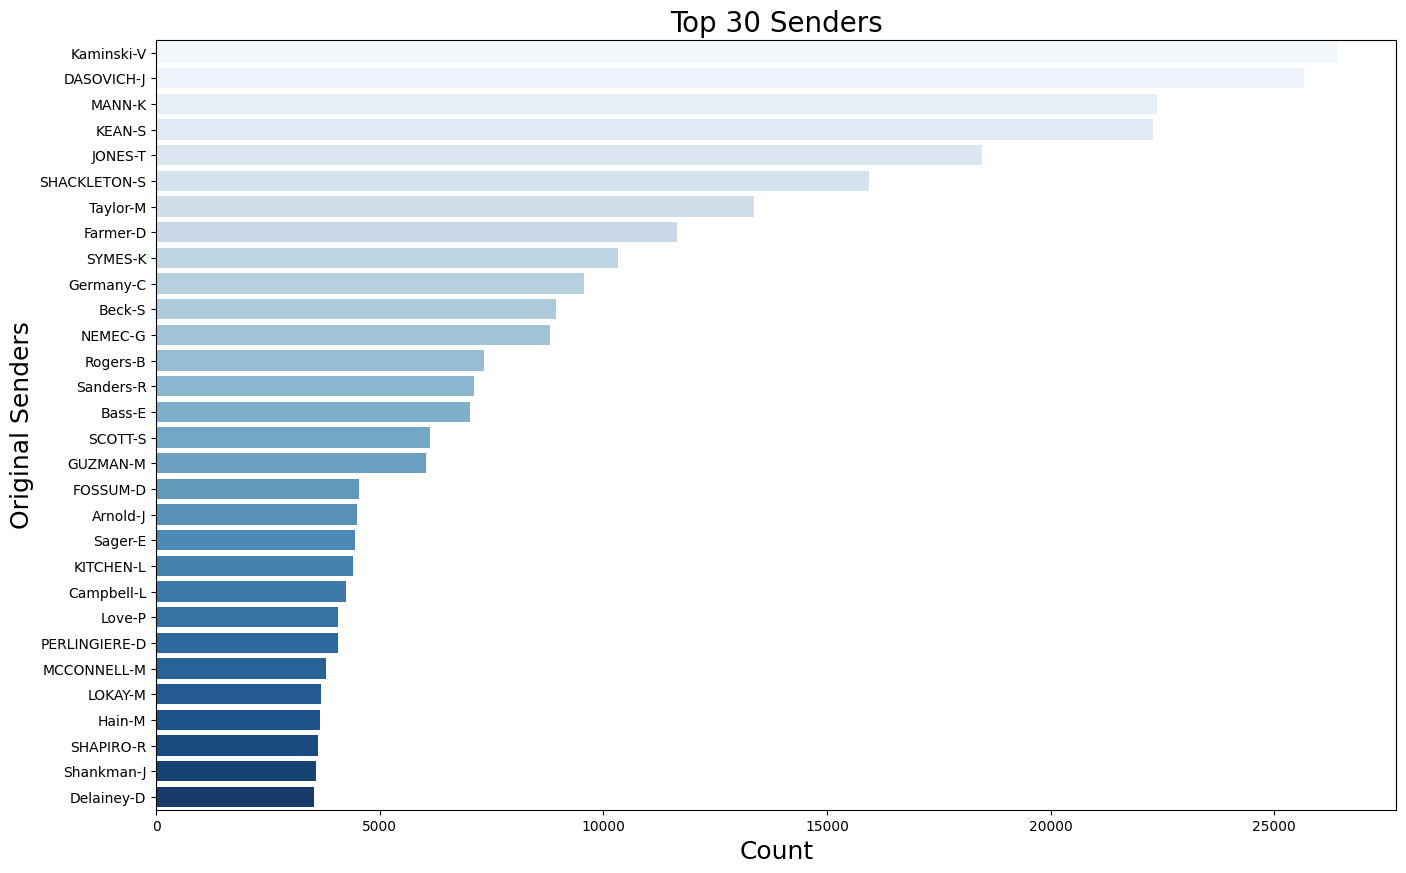

In [27]:
plt.figure(figsize = (16,10))
ax = sns.barplot(x = df['X-Origin'].value_counts().values[:30], y = df['X-Origin'].value_counts().keys()[:30] ,palette = 'Blues', orient = 'h')
ax.set_xlabel('Count', fontsize = 18)
ax.set_ylabel('Original Senders', fontsize = 18)
ax.set_title('Top 30 Senders', fontsize = 20)
plt.show()

<ipython-input-28-83c7d323c319>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = df['To'].value_counts().values[:30], y = df['To'].value_counts().keys()[:30] ,palette = 'dark', orient = 'h')


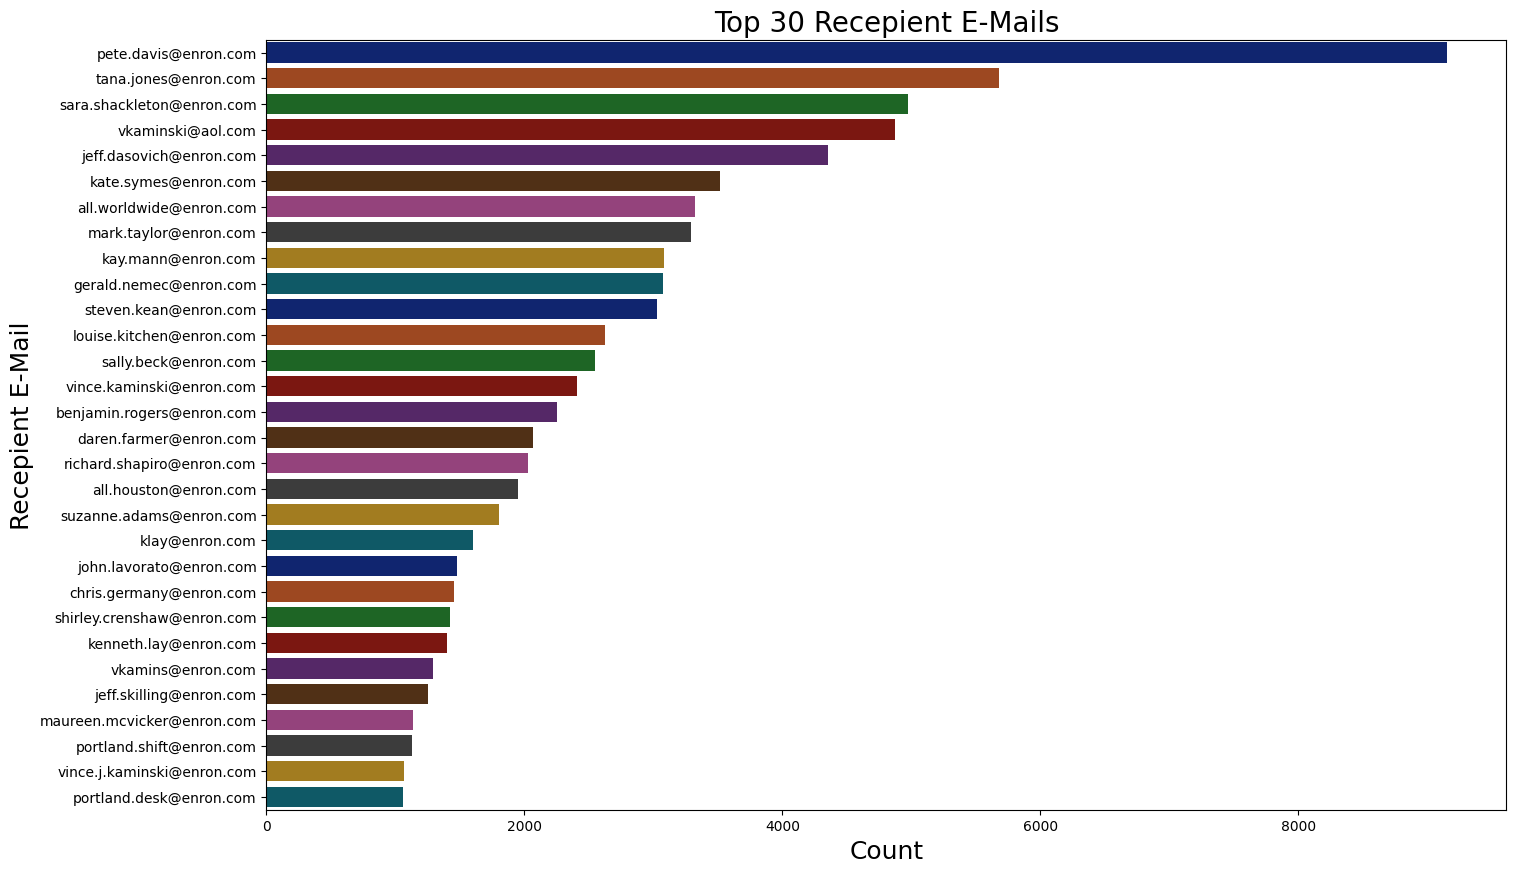

In [28]:
# diagram showing top recepients
plt.figure(figsize = (16,10))
ax = sns.barplot(x = df['To'].value_counts().values[:30], y = df['To'].value_counts().keys()[:30] ,palette = 'dark', orient = 'h')
ax.set_xlabel('Count', fontsize = 18)
ax.set_ylabel('Recepient E-Mail', fontsize = 18)
ax.set_title('Top 30 Recepient E-Mails', fontsize = 20)
plt.show()

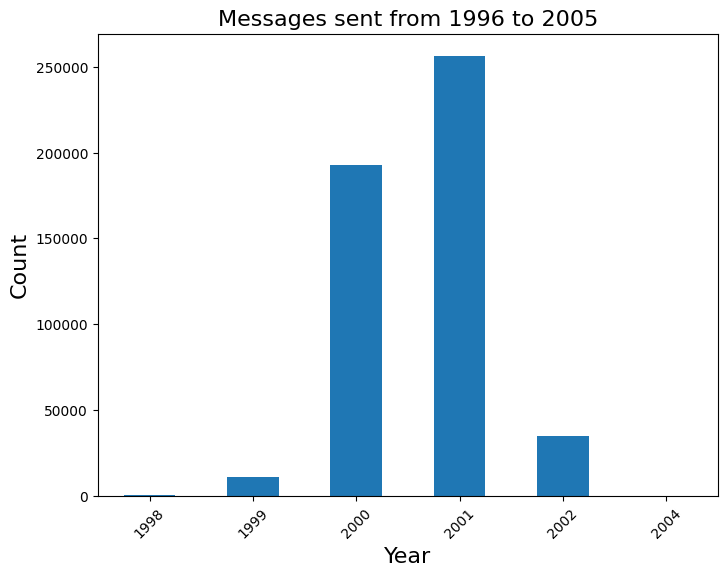

In [29]:

filtered_df = df[(df['Year'] >= 1998) & (df['Year'] <= 2004)]
count_by_year = filtered_df.groupby('Year')['X-Origin'].count()

# Create a bar chart
ax = count_by_year.plot(kind='bar', figsize=(8, 6))
ax.set_xlim(-0.5, len(count_by_year)-0.5)  # Adjust the x-axis limits for better appearance
ax.set_xticks(range(len(count_by_year)))
ax.set_xticklabels(count_by_year.index, rotation=45)  # Adjust rotation for readability
ax.set_xlabel('Year', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.set_title('Messages sent from 1996 to 2005', fontsize=16)

plt.show()

In [30]:
#NLP

In [31]:
import nltk
import wordcloud

In [32]:
import nltk

# Download the 'stopwords' dataset
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [33]:
!pip install stopwords

In [34]:
stopwords = nltk.corpus.stopwords.words('english')
newstopwords = ['Re', 'FW', 'Fwd', 'EOL', 'E', 'mail', 'PLEASE', 'Ahead']
for i in newstopwords:
    stopwords.append(i)

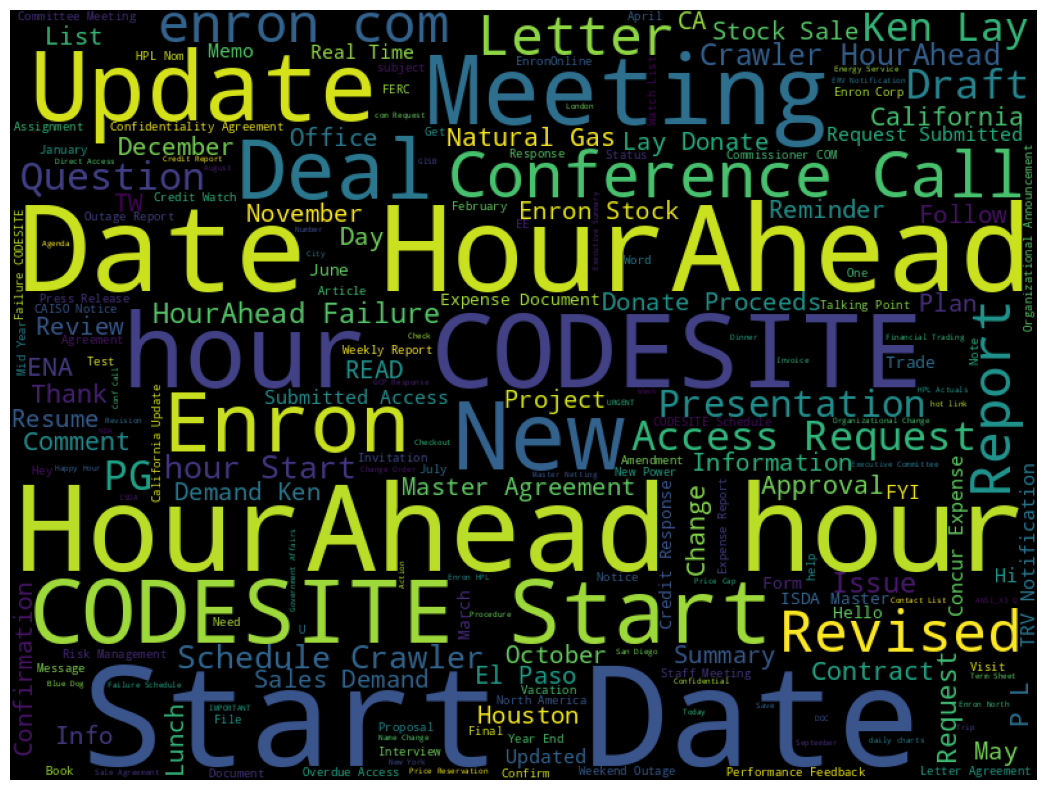

In [35]:
subjects = ' '.join(df['Subject'].values)
fig, ax = plt.subplots(figsize=(14, 10))
wc = wordcloud.WordCloud(width = 800, height = 600, max_words = 200, stopwords = stopwords).generate(subjects)
ax.imshow(wc)
plt.axis('off')
plt.show()

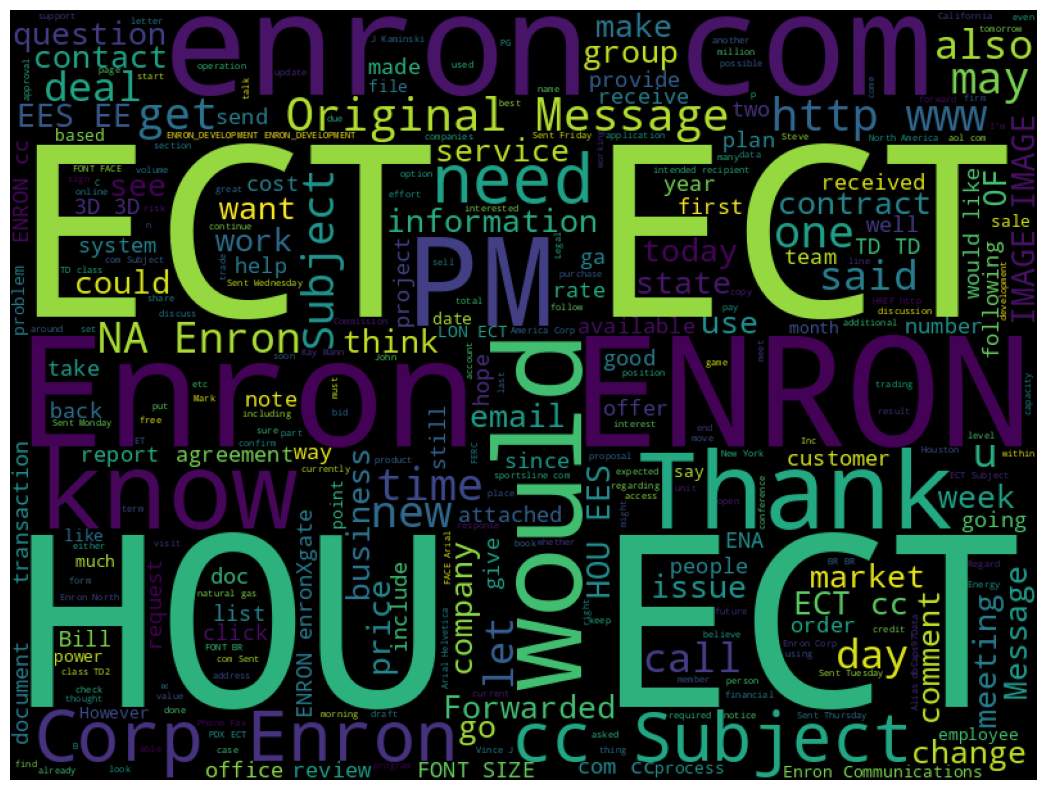

In [36]:
content = ' '.join(df['Body'].sample(5000).values)
fig, ax = plt.subplots(figsize=(14, 10))
wc = wordcloud.WordCloud(width = 800, height = 600, max_words = 300, stopwords = stopwords).generate(content)
ax.imshow(wc)
plt.axis('off')
plt.show()

In [37]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [38]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [39]:
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

unzip:  cannot find or open /usr/share/nltk_data/corpora/wordnet.zip, /usr/share/nltk_data/corpora/wordnet.zip.zip or /usr/share/nltk_data/corpora/wordnet.zip.ZIP.


In [40]:


def cleaningbody(col):
    msgcol = []
    for msg in col.values:
        msg = re.sub(r'[<>\n+\t+\s+\*]', ' ', msg)
        msg = re.sub(r'[0-9]+[a-zA-Z]+\d+[?!].DOC', ' ', msg)
        msg = re.sub(r'[?\s+\-+\s+?_=~]', ' ', msg)
        msg = re.sub(r' +', ' ', msg)
        msg = msg.lower().strip(' ')
        msgcol.append(msg)
    return msgcol

# Assuming df is your DataFrame with the 'Body' column
df['Body'] = cleaningbody(df['Body'])

# Save the DataFrame to a CSV file
# df.to_csv('preprocessed_text.csv', index=False)

In [41]:
df.isna().sum()

,0
Date,0
From,0
To,0
Subject,0
X-From,0
X-To,0
X-Folder,0
X-Origin,0
X-Filename,0
Body,0


In [9]:
!pip install langchain-groq


[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
from langchain_groq import ChatGroq

llm = ChatGroq(
    model="llama-3.1-70b-versatile",
    groq_api_key="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",
    temperature=0,
)

In [45]:
df.head(2)


,Date,From,To,Subject,X-From,X-To,X-Folder,X-Origin,X-Filename,Body,Employee,Year
0,2001-05-14 23:39:00+00:00,phillip.allen@enron.com,tim.belden@enron.com,,Phillip K Allen,Tim Belden,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst,here is our forecast,allen-p,2001
1,2001-05-04 20:51:00+00:00,phillip.allen@enron.com,john.lavorato@enron.com,Re:,Phillip K Allen,John J Lavorato,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst,traveling to have a business meeting takes the...,allen-p,2001


In [46]:
df['Subject']

,Subject
0,
1,Re:
2,Re: test
3,
4,Re: Hello
...,...
517396,Trade with John Lavorato
517397,Gas Hedges
517398,RE: CONFIDENTIAL
517399,Calgary Analyst/Associate


In [96]:
df.loc[1,'Body']

"traveling to have a business meeting takes the fun out of the trip. especially if you have to prepare a presentation. i would suggest holding the business plan meetings here then take a trip without any formal business meetings. i would even try and get some honest opinions on whether a trip is even desired or necessary. as far as the business meetings, i think it would be more productive to try and stimulate discussions across the different groups about what is working and what is not. too often the presenter speaks and the others are quiet just waiting for their turn. the meetings might be better if held in a round table discussion format. my suggestion for where to go is austin. play golf and rent a ski boat and jet ski's. flying somewhere takes too much time."

In [97]:
df.loc[1,'Subject']

'Re:'

In [79]:
import os
os.listdir('/content/')


['.config',
 '0402262c-b61c-4d17-99f1-034e05bb416c',
 'index_metadata.pickle',
 'link_lists.bin',
 'data_level0.bin',
 'length.bin',
 'chroma.sqlite3',
 'header.bin',
 'enron-email-dataset',
 'sample_data']

In [36]:
import pandas as pd
pf=pd.read_csv('preprocess_final_text.csv')

In [55]:
print("Dataset length:", len(pf))

Dataset length: 472487


In [50]:
pf.head()

,Date,From,To,Subject,X-From,X-To,X-Folder,X-Origin,X-Filename,Body,Employee,Year
0,2001-05-04 20:51:00+00:00,phillip.allen@enron.com,john.lavorato@enron.com,Re:,Phillip K Allen,John J Lavorato,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst,traveling to have a business meeting takes the...,allen-p,2001
1,2000-10-18 10:00:00+00:00,phillip.allen@enron.com,leah.arsdall@enron.com,Re: test,Phillip K Allen,Leah Van Arsdall,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,test successful. way to go!!!,allen-p,2000
2,2000-08-31 12:07:00+00:00,phillip.allen@enron.com,greg.piper@enron.com,Re: Hello,Phillip K Allen,Greg Piper,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,let's shoot for tuesday at 11:45.,allen-p,2000
3,2000-08-31 11:17:00+00:00,phillip.allen@enron.com,greg.piper@enron.com,Re: Hello,Phillip K Allen,Greg Piper,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,"greg, how about either next tuesday or thursda...",allen-p,2000
4,2000-07-14 13:59:00+00:00,phillip.allen@enron.com,joyce.teixeira@enron.com,Re: PRC review - phone calls,Phillip K Allen,Joyce Teixeira,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,any morning between 10 and 11:30,allen-p,2000


In [37]:
subjects=pf['Subject'].to_list()
bodies=pf['Body'].to_list()

In [38]:
import faiss
from langchain.vectorstores import FAISS
from langchain.embeddings import SentenceTransformerEmbeddings
import numpy as npssss
# try:

#     # Initialize a SentenceTransformer model for text embeddings
#     model = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2")
#     print("Model loaded successfully.")

#     # Vectorize the subjects and bodies
#     subject_embeddings = model.embed_documents(subjects)
#     print("Subjects vectorized successfully.")
#     body_embeddings = model.embed_documents(bodies)
#     print("Bodies vectorized successfully.")

#     # Combine the embeddings if you need to query both
#     embeddings = np.array(subject_embeddings + body_embeddings)
#     print("Embeddings combined successfully.")

# except Exception as e:
#     print(f"An error occurred: {e}")


In [39]:
model = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2")

In [5]:
#model = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2")

# Example email bodies (replace with your dataset)
email_bodies = pf['Body'].to_list()  # List of email body texts
batch_size = 1000  # Adjust based on your system's capacity

all_embeddings = []

for i in range(0, len(email_bodies), batch_size):
    batch = email_bodies[i:i + batch_size]
    print(f"Processing batch {i // batch_size + 1}...")
    batch_embeddings = model.embed_documents(batch)
    all_embeddings.extend(batch_embeddings)

# Convert all embeddings to a NumPy array
all_embeddings = np.array(all_embeddings)
print("Embedding completed.")

C:\Users\desha\AppData\Local\Temp\ipykernel_13040\1805230563.py:1: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  model = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2")
c:\Users\desha\Desktop\hireforge\new_venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Processing batch 1...
Processing batch 2...
Processing batch 3...
Processing batch 4...
Processing batch 5...
Processing batch 6...
Processing batch 7...
Processing batch 8...
Processing batch 9...
Processing batch 10...
Processing batch 11...
Processing batch 12...
Processing batch 13...
Processing batch 14...
Processing batch 15...
Processing batch 16...
Processing batch 17...
Processing batch 18...
Processing batch 19...
Processing batch 20...
Processing batch 21...
Processing batch 22...
Processing batch 23...
Processing batch 24...
Processing batch 25...
Processing batch 26...
Processing batch 27...
Processing batch 28...
Processing batch 29...
Processing batch 30...
Processing batch 31...
Processing batch 32...
Processing batch 33...
Processing batch 34...
Processing batch 35...
Processing batch 36...
Processing batch 37...
Processing batch 38...
Processing batch 39...
Processing batch 40...
Processing batch 41...
Processing batch 42...
Processing batch 43...
Processing batch 44.

In [41]:
# np.save("email_embeddings.npy", all_embeddings)
# print("Raw embeddings saved to 'email_embeddings.npy'.")


In [42]:
import numpy as np
all_embeddings = np.load("email_embeddings.npy")
print("Embeddings loaded successfully:", all_embeddings.shape)

Embeddings loaded successfully: (472487, 384)


In [7]:
# Create a FAISS index
index = faiss.IndexFlatL2(all_embeddings.shape[1])  # L2 distance metric for similarity search

# Add embeddings to the index
index.add(all_embeddings)

print(f"FAISS index created with {index.ntotal} embeddings.")


FAISS index created with 472487 embeddings.


In [62]:
# faiss.write_index(index, "email_embeddings_index.faiss")
# print("FAISS index saved to 'email_embeddings_index.faiss'.")


FAISS index saved to 'email_embeddings_index.faiss'.


In [63]:
import faiss

# Load the FAISS index from the file
index = faiss.read_index("email_embeddings_index.faiss")
print("FAISS index loaded successfully.")

FAISS index loaded successfully.


In [64]:
print("FAISS index dimensions:", index.d)
print("Embeddings shape:", all_embeddings.shape)

FAISS index dimensions: 384
Embeddings shape: (472487, 384)


In [56]:
# #dummy process to check

# # Select a random embedding from the preloaded embeddings
# dummy_embedding = all_embeddings[0].reshape(1, -1).astype("float32")

# # Perform similarity search
# D, I = index.search(dummy_embedding, k=5)

# print("Dummy retrieval indices:", I)
# print("Dummy retrieval distances:", D)

# # Check if valid results are retrieved
# if I[0][0] != -1:
#     print("Retrieved email body for index 0:", pf.iloc[I[0][0]]['Body'])
# else:
#     print("No valid results for dummy embedding.")


Dummy retrieval indices: [[   0  202  630 1682 1896]]
Dummy retrieval distances: [[0. 0. 0. 0. 0.]]
Retrieved email body for index 0: traveling to have a business meeting takes the fun out of the trip. especially if you have to prepare a presentation. i would suggest holding the business plan meetings here then take a trip without any formal business meetings. i would even try and get some honest opinions on whether a trip is even desired or necessary. as far as the business meetings, i think it would be more productive to try and stimulate discussions across the different groups about what is working and what is not. too often the presenter speaks and the others are quiet just waiting for their turn. the meetings might be better if held in a round table discussion format. my suggestion for where to go is austin. play golf and rent a ski boat and jet ski's. flying somewhere takes too much time.


In [46]:
# import faiss
# from langchain.vectorstores import FAISS
# # Create a FAISS index
# index = faiss.IndexFlatL2(embeddings.shape[1])  # L2 distance metric for similarity search
# index.add(embeddings)  # Add the embeddings to the index


In [51]:
query_subject = "Re:"
query_body = "traveling to have a business meeting takes the fun out of the trip. especially if you have to prepare a presentation. i would suggest holding the business plan meetings here then take a trip without any formal business meetings. i would even try and get some honest opinions on whether a trip is even desired or necessary. as far as the business meetings, i think it would be more productive to try and stimulate discussions across the different groups about what is working and what is not. too often the presenter speaks and the others are quiet just waiting for their turn. the meetings might be better if held in a round table discussion format. my suggestion for where to go is austin. play golf and rent a ski boat and jet ski's. flying somewhere takes too much time."

In [52]:
from langchain.prompts import PromptTemplate
email_template = PromptTemplate(
    input_variables=["subject", "context"],
    template=(
        "You are an AI email generator. Based on the subject and additional context provided below, "
        "generate a professional and engaging email body in a formal tone. Make sure to integrate the context seamlessly into the email body.\n\n"

        "Subject: {subject}\n\n"

        "Dear [Recipient],\n\n"

        "I hope this email finds you well.\n\n"

        "{context}\n\n"

        "Please feel free to reach out if you have any questions or need further information. I look forward to your response.\n\n"

        "Best regards,\n"
        "[Your Name]"
    ),
)

In [57]:
def generate_email(query_subject, query_body):
    # Step 1: Embed the input subject and body
    query_embedding = model.embed_documents([query_subject + query_body])

    # Step 2: Ensure the query embedding is a 2D NumPy array
    query_embedding = np.array(query_embedding, dtype="float32").reshape(1, -1)
    print("Query embedding (first 10 values):", query_embedding.flatten()[:10])
    print("First indexed embedding (first 10 values):", all_embeddings[0][:10])
    print("Query embedding shape:", query_embedding.shape)

    # Step 3: Perform similarity search in FAISS index
    try:
        D, I = index.search(query_embedding, k=5)  # Retrieve top 5 relevant results
        print("Retrieved indices:", I)
        print("Retrieved distances:", D)
    except Exception as e:
        return f"Error during similarity search: {e}"

    # Step 4: Extract the closest body text from the top results
    closest_bodies = []
    for i in I[0]:
        if i != -1:  # Exclude invalid results
            print(f"Retrieving email body for index {i}")
            closest_bodies.append(pf.iloc[i]['Body'])
    
    print("Closest bodies:")
    
    # If no valid results are found, return a meaningful message
    if not closest_bodies:
        return "No similar email bodies found in the dataset."

    combined_context = " ".join(closest_bodies)
    print("Combined context for LangChain:", combined_context)

    # Step 5: Prepare the input for the LangChain prompt
    input_data = {
        "subject": query_subject,
        "context": combined_context
    }

    # Step 6: Generate email using the LangChain prompt
    try:
        email_chain = email_template | llm
        result = email_chain.invoke(input_data)
        return result.content
    except Exception as e:
        return f"Error during email generation: {e}"


In [58]:
# query_subject = "Re:"
# query_body = "traveling to have a business meeting takes the fun out of the trip. especially if you have to prepare a presentation. i would suggest holding the business plan meetings here then take a trip without any formal business meetings. i would even try and get some honest opinions on whether a trip is even desired or necessary. as far as the business meetings, i think it would be more productive to try and stimulate discussions across the different groups about what is working and what is not. too often the presenter speaks and the others are quiet just waiting for their turn. the meetings might be better if held in a round table discussion format. my suggestion for where to go is austin. play golf and rent a ski boat and jet ski's. flying somewhere takes too much time."

In [60]:
query_subject="Leave application"
query_body="want leave for three days meeting got postponed."

In [61]:
generate_email(query_subject,query_body)

Query embedding (first 10 values): [-0.00862825 -0.01990768  0.03159225  0.02817261 -0.01862461  0.0003304
  0.01228156 -0.02653141  0.02580314  0.0065267 ]
First indexed embedding (first 10 values): [ 0.10220679 -0.04333262  0.05037925  0.05705865 -0.09676979  0.00830111
  0.01354728 -0.04131663 -0.04007953 -0.09406307]
Query embedding shape: (1, 384)
Retrieved indices: [[247293 463194 272855 452777 465731]]
Retrieved distances: [[0.6249348  0.8019791  0.83746886 0.83746886 0.83746886]]
Retrieving email body for index 247293
Retrieving email body for index 463194
Retrieving email body for index 272855
Retrieving email body for index 452777
Retrieving email body for index 465731
Closest bodies:
Combined context for LangChain: meeting has been postponed until further notice!!!! meeting is canceled. i will send out another meeting notice once i have rescheduled it. thanks, sonia the meeting for today has been cancelled the meeting for today has been cancelled the meeting for today has be

'Subject: Leave application\n\nDear [Recipient],\n\nI hope this email finds you well. I am writing to inform you that I will be taking a leave of absence and would like to request your approval. Due to unforeseen circumstances, I need to attend to a personal matter that requires my immediate attention.\n\nI would like to bring to your attention that our previously scheduled meeting has been postponed until further notice. As an alternative, I will send out a new meeting notice once I have rescheduled it, ensuring that all necessary parties are informed and can adjust their schedules accordingly.\n\nIn the meantime, please do not hesitate to reach out to me if you have any questions or require further information regarding my leave application or the rescheduled meeting. I appreciate your understanding and look forward to your response.\n\nBest regards,\n[Your Name]'

In [34]:
generated_email = generate_email(query_subject, query_body)
print(generated_email)

Subject: Re: Business Meeting and Trip Planning

Dear [Recipient],

I hope this email finds you well. I wanted to follow up on our previous discussion regarding the upcoming business meeting and trip. As we consider the logistics, I couldn't help but think that traveling for a business meeting can often take the fun out of the trip, especially when preparation for a presentation is involved.

To maximize the productivity of our business meetings, I suggest we hold them locally, allowing us to focus on stimulating discussions across different groups about what is working and what areas need improvement. Too often, traditional presentation formats can lead to a one-way conversation, with others waiting for their turn to speak. I believe a round-table discussion format would be more effective in fostering open and honest dialogue.

Regarding the trip, I propose we consider separating the business meetings from the leisure activities. This would enable us to have a more relaxed and enjoyab